In [6]:
identifier <- "topics_of_pos_and_neg_classified_tweets_pooled_with_respect_to_privacy"
paste(identifier , ".pkl", sep="") 

[1] "topics_of_pos_and_neg_classified_tweets_pooled_with_respect_to_privacy.pkl"

In [7]:
require("reticulate")
source_python("helper.py")
pickle_data <- read_pickle_file(paste(identifier , ".pkl", sep="") )

In [8]:
save(pickle_data,file=paste(identifier , ".Rda", sep="") )

In [15]:
logjed <- function(x)
    return(log(x + 1))
expjed <- function(x)
    return(exp(x) - 1)

In [2]:
library(mgcv)

Loading required package: nlme

This is mgcv 1.8-35. For overview type 'help("mgcv-package")'.



In [3]:
response = pickle_data$citationCount

In [4]:
data = data.frame(pickle_data)

In [7]:
sum(response>=5)

[1] 6097

In [8]:
length(response)

[1] 9657

In [ ]:
#response <- response[which(response<100)]

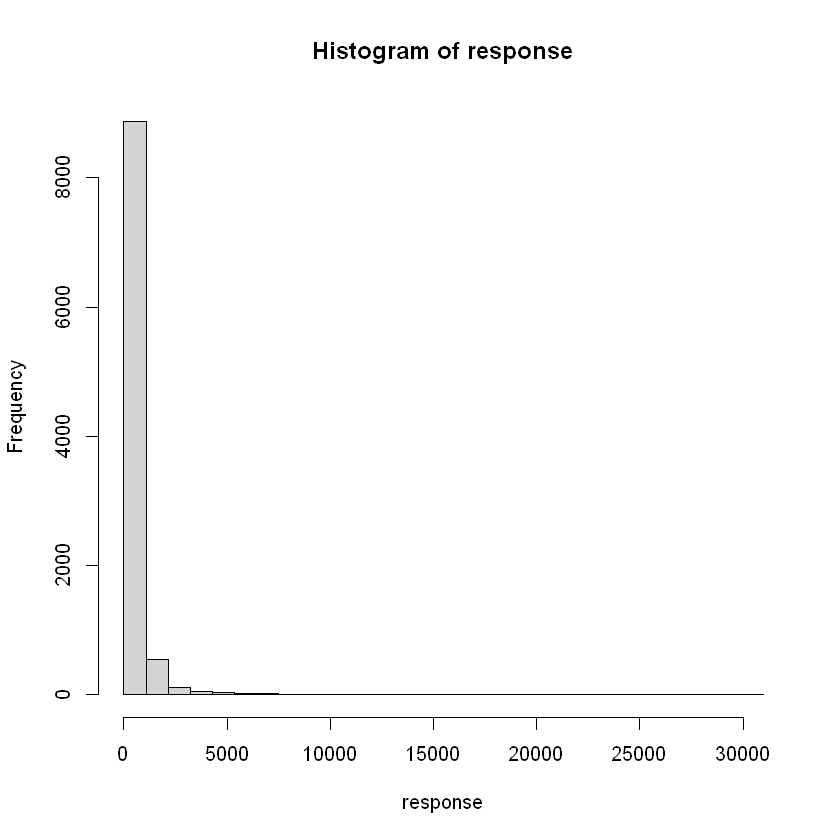

In [9]:
hist(response, breaks=seq(min(response), max(response), length.out=30))

In [17]:
log_response = logjed(response)

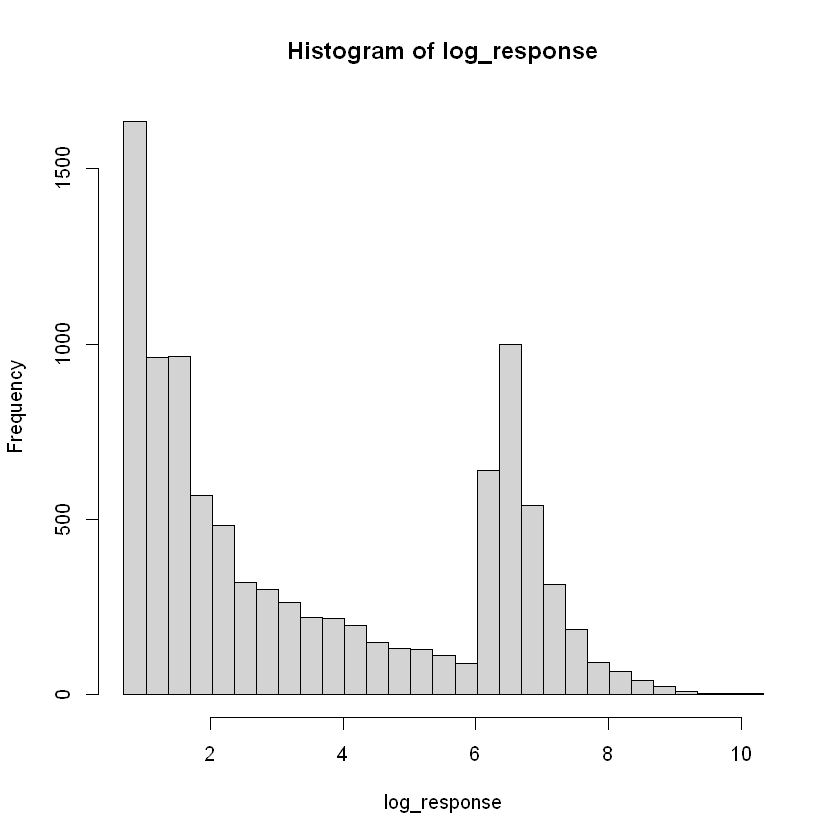

In [18]:
hist(log_response, breaks=seq(min(log_response), max(log_response), length.out=30))

In [10]:
head(data)

citationCount X0          X1          X2          X3          X4         
1    3          0.001125576 0.153912723 0.001125667 0.286736637 0.001125494
2    3          0.210950479 0.004170750 0.004171601 0.634931982 0.004170417
3   10          0.134206638 0.001668070 0.001668654 0.249296144 0.001667885
4   62          0.378250211 0.001282808 0.001282753 0.107797205 0.001282666
5 1962          0.021000331 0.001099697 0.001099718 0.254302084 0.001099546
6  305          0.057802353 0.205204263 0.001088915 0.001089036 0.001088792
  X5          X6          X7          X8          X9         
1 0.284883410 0.034992345 0.170686975 0.064285547 0.001125632
2 0.004170774 0.124921627 0.004170677 0.004170587 0.004171072
3 0.001668515 0.604819655 0.001668164 0.001668074 0.001668180
4 0.001282840 0.001282957 0.035691019 0.001282721 0.470564812
5 0.112014808 0.448945820 0.158238456 0.001099794 0.001099767
6 0.137492284 0.001089119 0.001089144 0.001088916 0.592967153

In [12]:
mod_gam <- gam(response ~  s(X0) + s(X1) + s(X2) + s(X3) + s(X4) + s(X5) + s(X6) + s(X7) + s(X8) + s(X9), 
               data=data, family=poisson)
summary(mod_gam)


Family: poisson 
Link function: log 

Formula:
response ~ s(X0) + s(X1) + s(X2) + s(X3) + s(X4) + s(X5) + s(X6) + 
    s(X7) + s(X8) + s(X9)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 5.119198   0.001398    3663   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
        edf Ref.df Chi.sq p-value    
s(X0) 8.865  8.994  12894  <2e-16 ***
s(X1) 8.980  9.000  73653  <2e-16 ***
s(X2) 8.926  8.997  12328  <2e-16 ***
s(X3) 8.974  9.000  71104  <2e-16 ***
s(X4) 8.976  9.000  18628  <2e-16 ***
s(X5) 8.866  8.994  64429  <2e-16 ***
s(X6) 8.948  8.999  24091  <2e-16 ***
s(X7) 8.894  8.997  25859  <2e-16 ***
s(X8) 8.937  8.998  36269  <2e-16 ***
s(X9) 8.923  8.998  19938  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =   0.15   Deviance explained =   38%
UBRE = 606.29  Scale est. = 1         n = 9657

In [20]:
reml_model <- gam(response ~  s(X0) + s(X1) + s(X2) + s(X3) + s(X4) + s(X5) + s(X6) + s(X7) + s(X8) + s(X9), 
               data=data, family=poisson, method="REML")
summary(reml_model)


Family: poisson 
Link function: log 

Formula:
response ~ s(X0) + s(X1) + s(X2) + s(X3) + s(X4) + s(X5) + s(X6) + 
    s(X7) + s(X8) + s(X9)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 5.118686   0.001403    3649   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
        edf Ref.df Chi.sq p-value    
s(X0) 8.971  9.000  12905  <2e-16 ***
s(X1) 8.997  9.000  73477  <2e-16 ***
s(X2) 8.949  8.999  12333  <2e-16 ***
s(X3) 8.979  9.000  71005  <2e-16 ***
s(X4) 8.995  9.000  18655  <2e-16 ***
s(X5) 8.991  9.000  64576  <2e-16 ***
s(X6) 8.993  9.000  24108  <2e-16 ***
s(X7) 8.991  9.000  26083  <2e-16 ***
s(X8) 8.993  9.000  36313  <2e-16 ***
s(X9) 8.990  9.000  20008  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.149   Deviance explained =   38%
-REML = 2.9575e+06  Scale est. = 1         n = 9657